In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.drop(['Loan_ID'],axis=1,inplace=True)  #Removing irrelavent columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
df.shape

(614, 12)

In [9]:
print(df.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [10]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode())

In [11]:
#Filling Null Values
df['Dependents'].fillna(value=df['Dependents'].mode()[0],inplace=True)
df['Gender'].fillna(value=df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(value=df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(value=df['Self_Employed'].mode()[0],inplace=True)

In [12]:
print(df.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


<Axes: xlabel='Self_Employed', ylabel='count'>

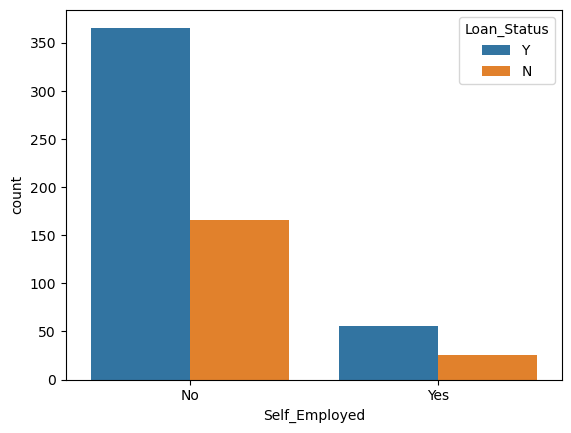

In [14]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

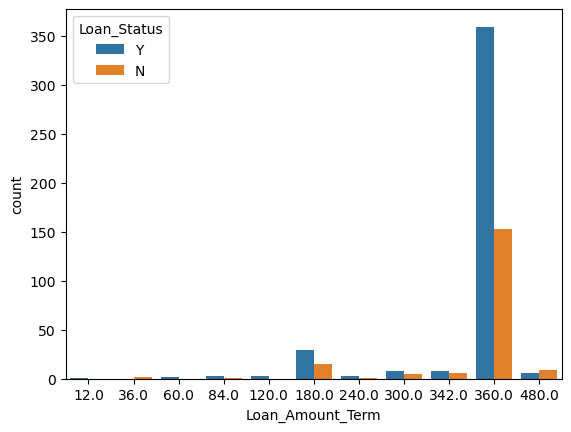

In [15]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

<Axes: xlabel='Credit_History', ylabel='count'>

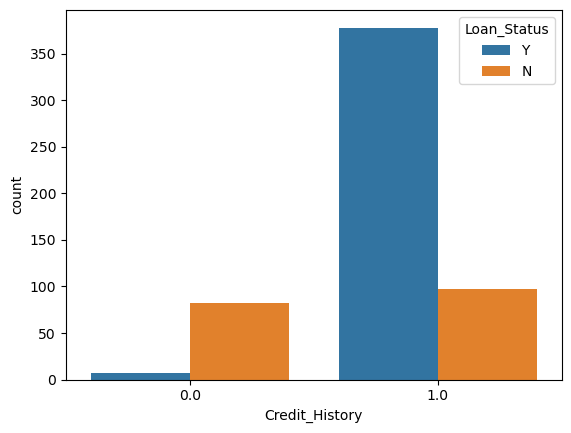

In [16]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

<Axes: xlabel='Dependents', ylabel='count'>

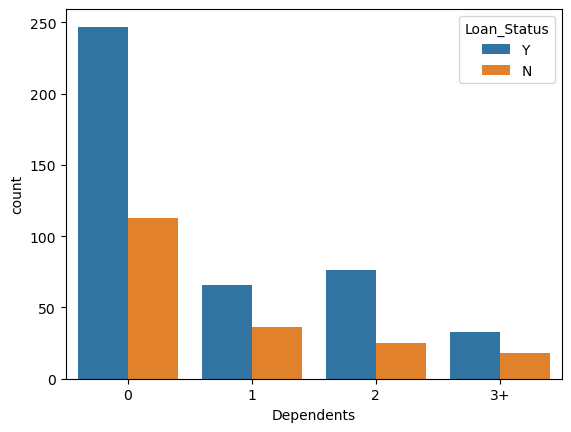

In [17]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

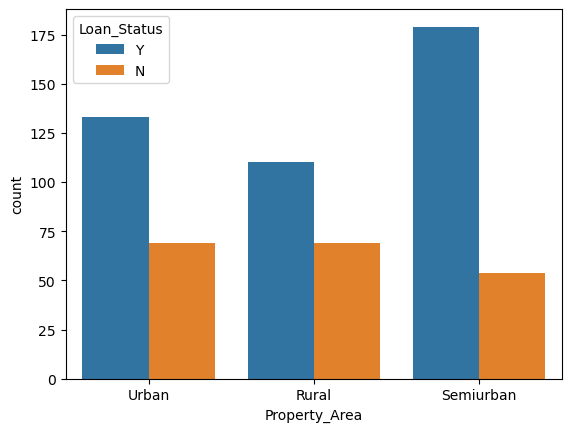

In [18]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

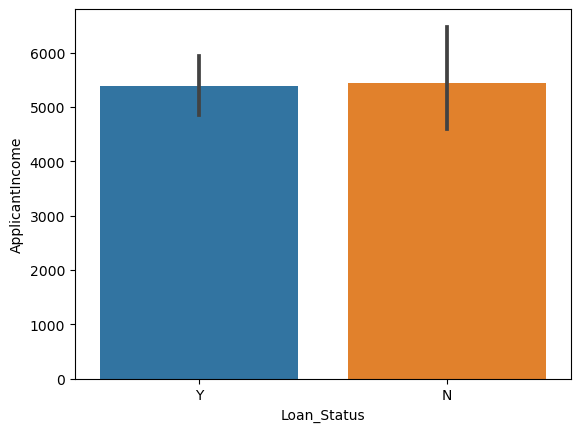

In [19]:
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

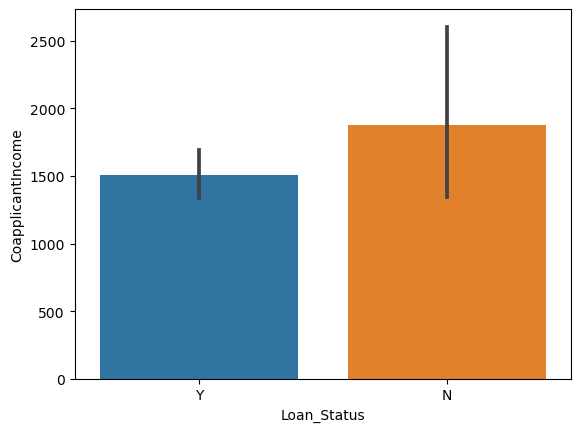

In [20]:
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)

<Axes: >

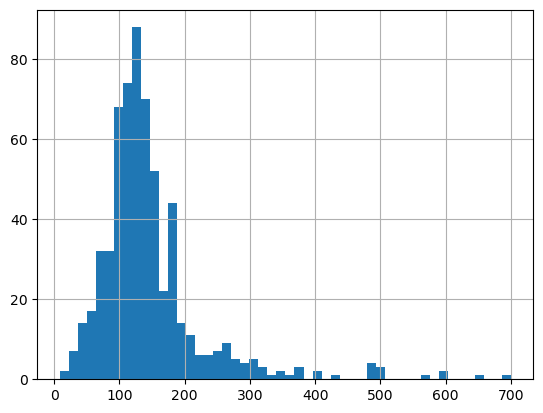

In [21]:
df['LoanAmount'].hist(bins=50)

In [23]:
df_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
df_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,-0.172914,-0.045364,0.000525,0.005853,-0.172693,0.030239,-0.031319,-0.009963,0.082045,0.017987
Married,-0.364569,1.000000,0.334216,0.012304,0.004489,-0.003163,0.233224,0.003281,0.028283,-0.032441,0.003071,-0.091478
Dependents,-0.172914,0.334216,1.000000,0.055752,0.056798,0.079403,-0.007295,0.053924,0.056024,0.044415,0.001781,-0.010118
Education,-0.045364,0.012304,0.055752,1.000000,-0.010383,0.073543,0.084689,-0.072995,0.078645,0.037534,-0.003592,0.085884
Self_Employed,0.000525,0.004489,0.056798,-0.010383,1.000000,0.005906,-0.080509,-0.008925,0.008366,-0.002117,0.021996,0.003700
ApplicantIncome,0.005853,-0.003163,0.079403,0.073543,0.005906,1.000000,0.378095,0.365594,-0.013189,0.010961,0.078590,-0.018675
CoapplicantIncome,-0.172693,0.233224,-0.007295,0.084689,-0.080509,0.378095,1.000000,0.203701,0.060137,-0.066805,0.018346,-0.084419
LoanAmount,0.030239,0.003281,0.053924,-0.072995,-0.008925,0.365594,0.203701,1.000000,0.020456,0.007100,0.114591,0.040160
Loan_Amount_Term,-0.031319,0.028283,0.056024,0.078645,0.008366,-0.013189,0.060137,0.020456,1.000000,0.041755,-0.066941,0.085191
Credit_History,-0.009963,-0.032441,0.044415,0.037534,-0.002117,0.010961,-0.066805,0.007100,0.041755,1.000000,0.004238,0.423212


<Axes: >

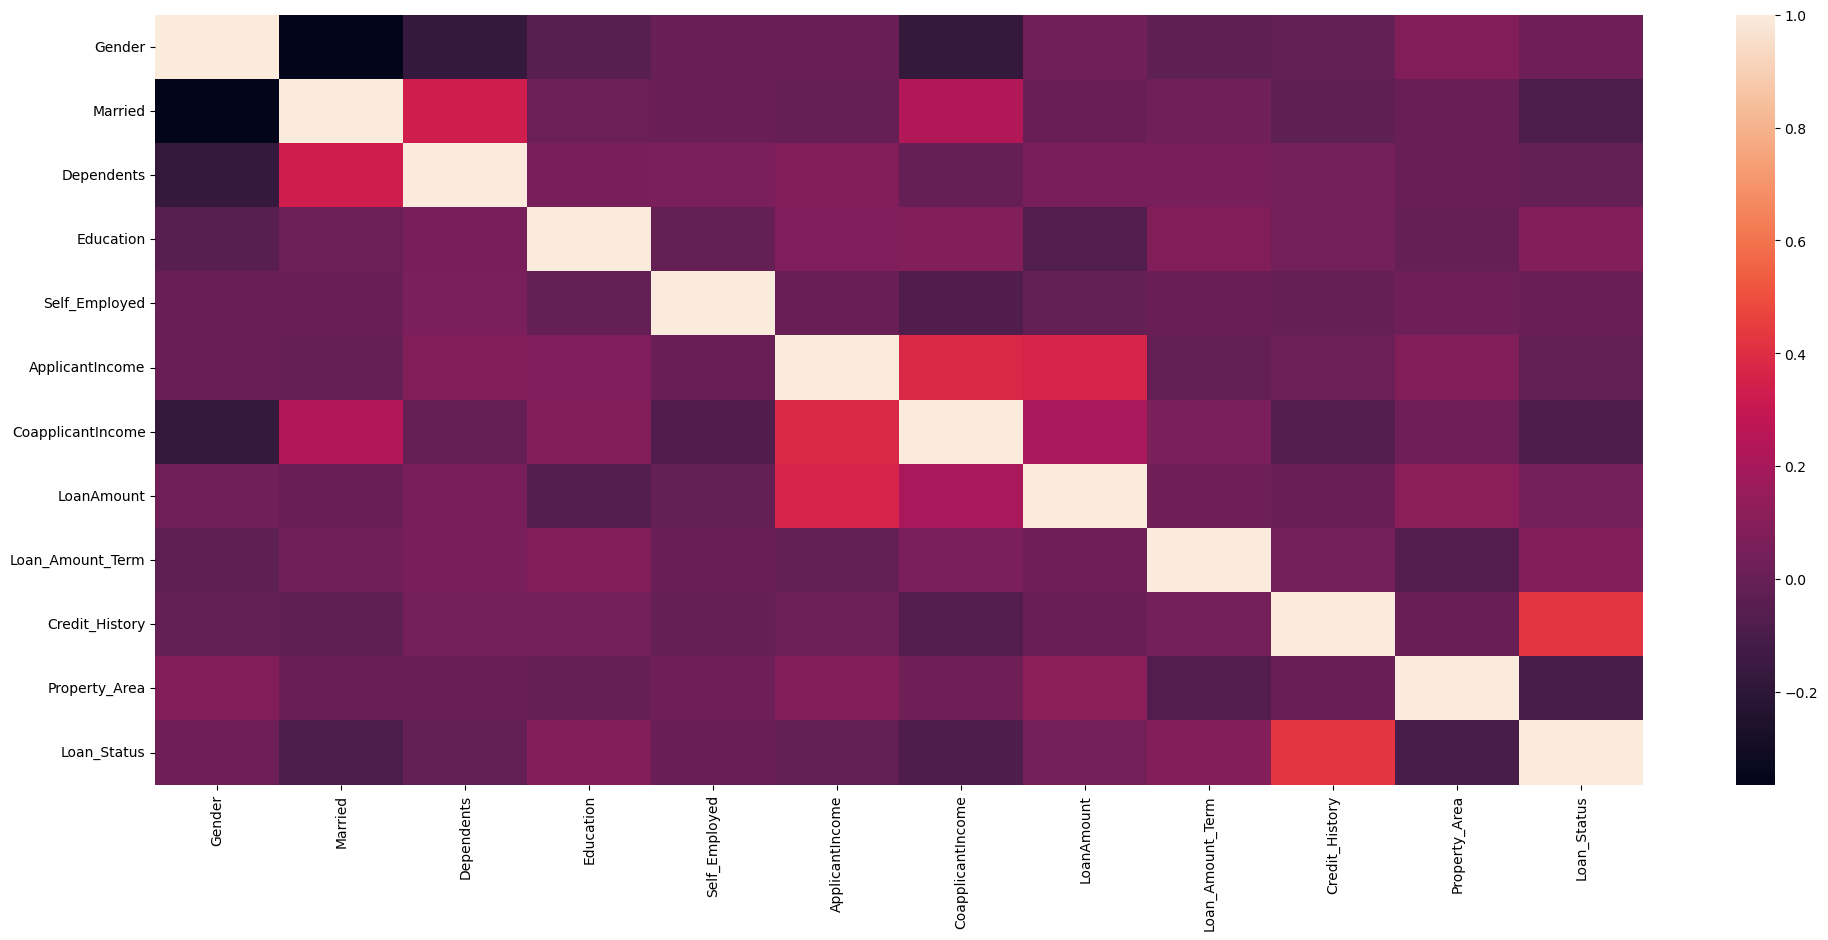

In [24]:
plt.figure(figsize=[24,10])
sns.heatmap(df_corr)

In [25]:
print(df.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [27]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Education']=LE.fit_transform(df['Education'])
df['Gender']=LE.fit_transform(df['Gender'])
df['Married']=LE.fit_transform(df['Married'])
df['Dependents']=LE.fit_transform(df['Dependents'])
df['Self_Employed']=LE.fit_transform(df['Self_Employed'])
df['Property_Area']=LE.fit_transform(df['Property_Area'])
df['Loan_Status']=LE.fit_transform(df['Loan_Status'])

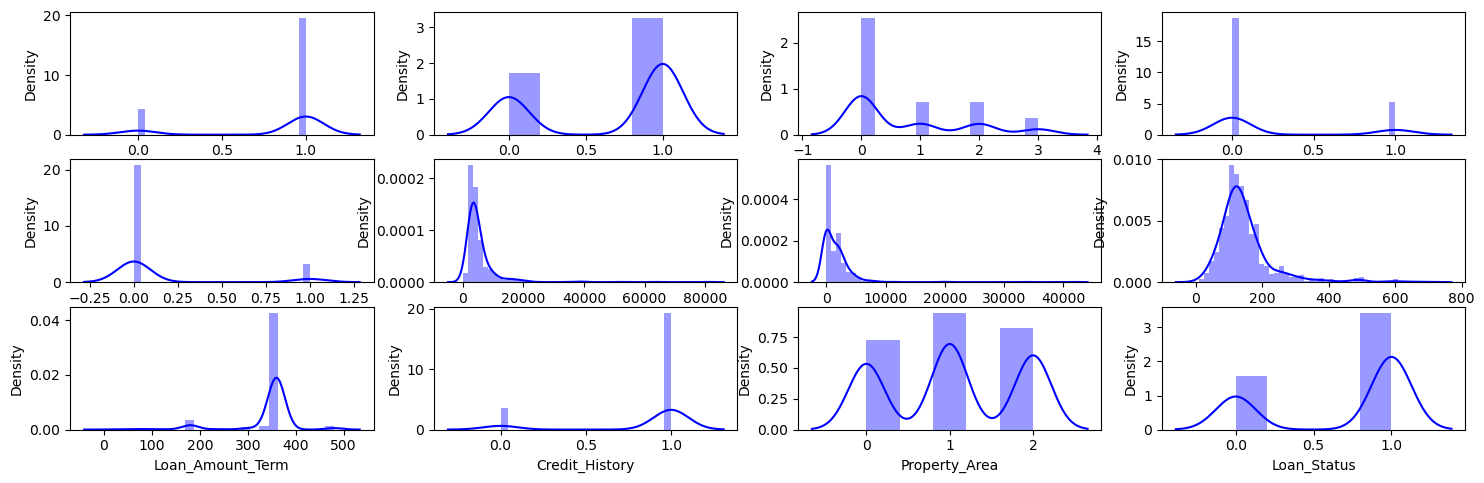

In [28]:
plt.figure(figsize=(18,15))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

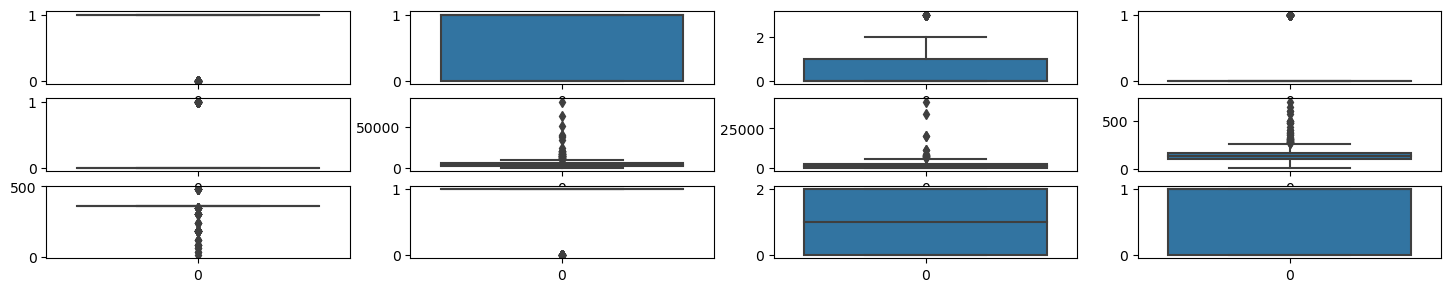

In [29]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

In [30]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.882361
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [31]:
from scipy import stats
import numpy as np
print("Old Shape: ", df.shape)   
z = np.abs(stats.zscore(df))
print(z)

Old Shape:  (614, 12)
       Gender   Married  Dependents  Education  Self_Employed  \
0    0.472343  1.372089    0.737806   0.528362       0.392601   
1    0.472343  0.728816    0.253470   0.528362       0.392601   
2    0.472343  0.728816    0.737806   0.528362       2.547117   
3    0.472343  0.728816    0.737806   1.892641       0.392601   
4    0.472343  1.372089    0.737806   0.528362       0.392601   
..        ...       ...         ...        ...            ...   
609  2.117107  1.372089    0.737806   0.528362       0.392601   
610  0.472343  0.728816    2.236021   0.528362       0.392601   
611  0.472343  0.728816    0.253470   0.528362       0.392601   
612  0.472343  0.728816    1.244745   0.528362       0.392601   
613  2.117107  1.372089    0.737806   0.528362       2.547117   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.072991           0.554487    0.000000          0.279851   
1           0.134412           0.038732    0.219273

In [32]:
threshold = 3
print(np.where(z > 3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [33]:
after_zscore = df[(z < 3).all(axis=1)]

In [34]:
after_zscore.shape

(0, 12)

In [35]:
df.shape

(614, 12)

In [36]:
df=after_zscore

In [37]:
df.skew()

Gender              NaN
Married             NaN
Dependents          NaN
Education           NaN
Self_Employed       NaN
ApplicantIncome     NaN
CoapplicantIncome   NaN
LoanAmount          NaN
Loan_Amount_Term    NaN
Credit_History      NaN
Property_Area       NaN
Loan_Status         NaN
dtype: float64

In [38]:
df1 = np.sqrt(df)

df1.head(15)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [39]:
df1.skew()

Gender              NaN
Married             NaN
Dependents          NaN
Education           NaN
Self_Employed       NaN
ApplicantIncome     NaN
CoapplicantIncome   NaN
LoanAmount          NaN
Loan_Amount_Term    NaN
Credit_History      NaN
Property_Area       NaN
Loan_Status         NaN
dtype: float64